# <center>"The effects of social tagging and ratings by consumer segment on Streaming Video on Demand chart success: A quantitative analysis"</center>
## <center>MASTER THESIS MARKETING ANALYTICS</center>
### <center>Fall 2021</center>
<br>
Name: A.V. Molina
<br>
SNR: 2030852
<br>
Supervisor: Dr. George Knox
<br>
Second Assessor: Dr. Samuel Stäbler
<br>
Date: January 3, 2022
<br><br>
This project is part of my master's thesis in Marketing Analytics (Fall 2021).
<br><br>

## Table of contents
* [1. Import Python libraries](#1.-Import-Python-libraries)
* [2. Import File](#2.-Import-File)
* [3. Check Social Tags](#3.-Check-Social-Tags)
* [4. Run PCA on Social Tags](#4.-Run-PCA-on-Social-Tags)
* [5. Check Genres](#5.-Check-Genres)
* [6. Check ratings by consumer segment](#6.-Check-ratings-by-consumer-segment)
* [7. Check all dataframes](#7.-Check-all-dataframes)
* [8. Create new dataframe for Cox PH analysis](#8.-Create-new-dataframe-for-Cox-PH-analysis)
* [9. Descriptive Statistics](#9.-Descriptive-Statistics)
* [10. Cox PH Model 1](#10.-Cox-PH-Model-1)
* [11. Cox PH Model 2](#11.-Cox-PH-Model-2)
* [12. Cox PH Model 3](#12.-Cox-PH-Model-3)
* [13. Logrank Test on Video Type](#13.-Logrank-Test-on-Video-Type)
* [14. Cox PH Model 4](#14.-Cox-PH-Model-4)
* [15. Check Residuals on Model 3](#15.-Check-Residuals-on-Model-3)



## 1. Import Python libraries

<br><br>
For this project, I used the Python library <font color='Blue'>**LIFELINES**</font>
<br>

See: https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
<br><br>

[Back: Table of contents](#Table-of-contents)

In [1]:
from lifelines import CoxPHFitter #For Survival Analysis
import pandas as pd #Setup dataframe
import numpy as np #Enable arrays
from sklearn.preprocessing import StandardScaler #To standardize data
from sklearn.decomposition import PCA #For Principal Component Analysis
import matplotlib.pyplot as plt #For Plotting
import seaborn as sns #For Plotting
from statsmodels.stats.outliers_influence import variance_inflation_factor #Variance Inflation Factor
from scipy.stats import shapiro #Shapiro-Wilk-Test of Normality

## 2. Import File
Read file with Pandas.
<br>

[Back: Table of contents](#Table-of-contents)

In [2]:
df = pd.read_excel('netflix_data.xlsx')
df.head()

,Unnamed: 0,Title_URL,Title,Type,Netflix_exclusive,Netflix_Release_Date_Day,Initial_Rank,n_days_chart,n_genres,n_keywords,...,males_aged_30_44_rating,males_aged_45_plus_rating,females_rating,females_aged_under_18_rating,females_aged_18_29_rating,females_aged_30_44_rating,females_aged_45_plus_rating,top_1000_voters_rating,us_users_rating,non_us_users_rating
0,0,https://www.the-numbers.com/tv-show/Tiger-King...,"Tiger King: Murder, Mayhem …",TV Show,1,Friday,one,35,3,35,...,7.6,7.3,7.4,7.3,7.5,7.4,7.1,7.2,7.6,7.5
1,1,https://www.the-numbers.com/tv-show/All-Americ...,All American,TV Show,0,Thursday,two,66,2,14,...,7.3,6.6,8.0,6.5,8.0,8.0,7.9,5.9,7.6,7.1
2,2,https://www.the-numbers.com/tv-show/Self-Made-...,Self Made: Inspired by the …,TV Show,1,Friday,three,7,3,2,...,7.1,7.2,7.5,6.4,7.4,7.4,7.7,6.3,7.4,7.2
3,3,https://www.the-numbers.com/tv-show/Love-is-Bl...,Love is Blind,TV Show,1,Thursday,four,18,2,6,...,6.0,5.7,6.3,5.9,6.1,6.4,6.6,4.1,6.1,6.0
4,4,https://www.the-numbers.com/movie/Spenser-Conf...,Spenser Confidential,Movie,1,Friday,five,3,6,296,...,6.1,6.3,6.4,5.2,6.3,6.4,6.8,5.8,6.3,6.1


## 3. Check Social Tags
**Problems:** High dimensionality, multicollinearity and sparsity
<br>

[Back: Table of contents](#Table-of-contents)

In [3]:
df_tags = df.loc[:,'netflix_original':'animals_gone_bad']
df_tags.head()

,netflix_original,murder,violence,friendship,death,blood,title_spoken_by_character,fight,father_son_relationship,female_protagonist,...,dance_video_game,alicorn,magic_crystal,frightening,arrival,price,starling,married,animal_lead,animals_gone_bad
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Run PCA on Social Tags
### Steps:
1. Standardize data 
2. PCA: Define initial number of principal components
3. Check Scree Plot
4. Re-run PCa and adjust to optimal number of components
<br>

[Back: Table of contents](#Table-of-contents)

In [4]:
#define scaler
scaler = StandardScaler(with_mean=False,with_std=False) 

#create copy of DataFrame
scaled_df_tags=df_tags.copy()

#created scaled version of DataFrame
scaled_df_tags=pd.DataFrame(scaler.fit_transform(scaled_df_tags), columns=scaled_df_tags.columns)

#check shape
scaled_df_tags.shape

(527, 15701)

In [5]:
# Check scaled dataframe on social tags
scaled_df_tags.head()

,netflix_original,murder,violence,friendship,death,blood,title_spoken_by_character,fight,father_son_relationship,female_protagonist,...,dance_video_game,alicorn,magic_crystal,frightening,arrival,price,starling,married,animal_lead,animals_gone_bad
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# check if normalized data has mean = 0 and std = 1
np.mean(scaled_df_tags),np.std(scaled_df_tags)

(netflix_original    0.299810
 murder              0.216319
 violence            0.163188
 friendship          0.155598
 death               0.149905
                       ...   
 price               0.001898
 starling            0.001898
 married             0.001898
 animal_lead         0.001898
 animals_gone_bad    0.001898
 Length: 15701, dtype: float64,
 netflix_original    0.458175
 murder              0.411734
 violence            0.369537
 friendship          0.362474
 death               0.356978
                       ...   
 price               0.043519
 starling            0.043519
 married             0.043519
 animal_lead         0.043519
 animals_gone_bad    0.043519
 Length: 15701, dtype: float64)

In [7]:
#define PCA model to use
pca_tags = PCA(n_components=0.95)

#fit PCA model to data
pca_fit_tags = pca_tags.fit_transform(scaled_df_tags)

In [8]:
#Check number of PCs
pca_tags.n_components_

263

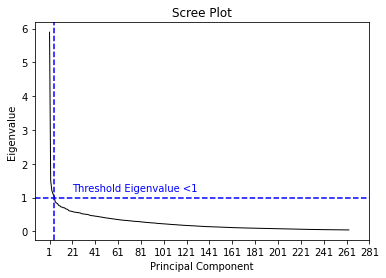

In [9]:
#Create Scree plot
PC_values = np.arange(pca_tags.n_components_) + 1
plt.plot(PC_values, pca_tags.explained_variance_, linewidth=1, color='black')
plt.xticks(np.arange(1, 300, step=20))
plt.axhline(y=1, color='blue', linestyle='--')
plt.axvline(x=5, color='blue', linestyle='--')
plt.text(21, 1.2, 'Threshold Eigenvalue <1', color = 'blue', fontsize=10)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [10]:
#define new PCA model to use
pca_tags2 = PCA(n_components=5)

#fit new PCA model to data
pca_fit_tags2 = pca_tags2.fit_transform(scaled_df_tags)

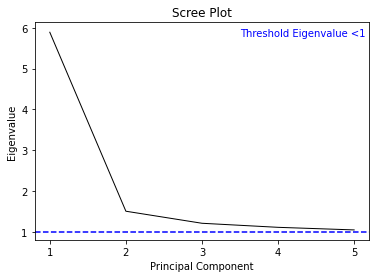

In [11]:
#Create Scree plot
PC_values = np.arange(pca_tags2.n_components_) + 1
plt.plot(PC_values, pca_tags2.explained_variance_, linewidth=1, color='black')
plt.xticks(np.arange(1, 6, step=1))
plt.axhline(y=1, color='blue', linestyle='--')
plt.text(3.5, 5.8, 'Threshold Eigenvalue <1', color = 'blue', fontsize=10)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [12]:
#Check new number of PCs
pca_tags2.n_components_

5

In [13]:
#Check Eigenvalue for each PC
pca_tags2.explained_variance_

array([5.89158659, 1.50312943, 1.20769736, 1.10822337, 1.04470782])

In [14]:
#Check explained variance ratio for each PC
for pc in enumerate(np.cumsum(pca_tags2.explained_variance_ratio_)):
    print (pc)

(0, 0.08237272749855695)
(1, 0.10338860651416651)
(2, 0.1202739265674348)
(3, 0.13576845930253148)
(4, 0.1503749547188749)


In [15]:
#Check loadings for each social tag
loadings = pca_tags2.components_.T * np.sqrt(pca_tags2.explained_variance_)

columns=['T1','T2','T3','T4','T5']

loading_matrix = pd.DataFrame(loadings, index=df_tags.columns,columns=columns)
loading_matrix.head(20)

,T1,T2,T3,T4,T5
netflix_original,-0.039584,-0.059075,0.004091,-0.022398,-0.029186
murder,0.250632,0.041658,0.013225,-0.052883,-0.041797
violence,0.251238,0.035643,0.027787,-0.050373,-0.010049
friendship,0.043249,0.110917,-0.032674,0.011712,0.047882
death,0.239927,0.021429,0.029461,-0.041210,0.006961
blood,0.236664,0.051791,0.003853,-0.059874,-0.016413
title_spoken_by_character,0.161471,0.024556,-0.005378,0.019994,0.061587
fight,0.202490,0.019920,0.078400,-0.009849,0.003058
father_son_relationship,0.102648,0.086842,0.013431,0.021385,0.087036
female_protagonist,0.021684,0.057921,0.023964,-0.001112,-0.010505


In [16]:
#Put Principal Components into dataframe
columns=['T1','T2','T3','T4','T5']
pca_fit_tags = pd.DataFrame(data = pca_fit_tags2,columns=columns)
tags_df = pca_fit_tags
tags_df.head()

,T1,T2,T3,T4,T5
0,-1.012896,-0.363969,-0.049836,-0.046033,-0.248076
1,-0.916637,-0.024111,-0.085391,0.049812,0.033730
2,-1.098297,-0.387206,-0.074375,0.007175,-0.157390
3,-1.112076,-0.301301,-0.053251,-0.033204,-0.109063
4,7.597362,-0.250368,-2.279508,-1.040644,-1.272990


## 5. Check Genres
**Steps:**
1. Create separate dataframe
2. Standardize data
3. Check for multicollinerity with VIF
4. Plot correlation 
<br>

[Back: Table of contents](#Table-of-contents)

In [17]:
#Create separate dataframe
df_genres = df.loc[:,'Drama':'Talk_Show']
df_genres.head()

,Drama,Comedy,Thriller,Action,Crime,Adventure,Family,Fantasy,Romance,Animation,...,History,Biography,Sport,Musical,Music,Game_Show,War,Short,Western,Talk_Show
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#define scaler
scaler_g = StandardScaler(with_mean=True,with_std=True) 

#create copy of DataFrame
scaled_df_genres=df_genres.copy()

#created scaled version of DataFrame
scaled_df_genres=pd.DataFrame(scaler_g.fit_transform(scaled_df_genres), columns=scaled_df_genres.columns)

#check shape
scaled_df_genres.shape

(527, 25)

In [19]:
#Check scaled dataframe
scaled_df_genres.head()

,Drama,Comedy,Thriller,Action,Crime,Adventure,Family,Fantasy,Romance,Animation,...,History,Biography,Sport,Musical,Music,Game_Show,War,Short,Western,Talk_Show
0,-0.946406,-0.766387,-0.604388,-0.560548,1.851640,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,5.317685,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
1,1.056629,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,-0.188052,5.651327,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
2,1.056629,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,4.221543,5.317685,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
3,-0.946406,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,2.399252,-0.378374,...,-0.236880,-0.188052,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
4,1.056629,1.304823,1.654566,1.783967,1.851640,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,-0.188052,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721


In [20]:
# Check genres for multicollinearity with Variance Inflation Factor

vif_genres = pd.DataFrame()
vif_genres["feature"] = scaled_df_genres.columns
  
# calculating VIF for each feature
vif_genres["VIF"] = [variance_inflation_factor(scaled_df_genres.values, i)
                          for i in range(len(scaled_df_genres.columns))]
  
print(vif_genres.sort_values(by='VIF', ascending=False), end='\n\n')
print('VIF values not significant for multicollinearity')

        feature       VIF
5     Adventure  2.165796
2      Thriller  2.064021
1        Comedy  2.031148
10  Documentary  1.961302
9     Animation  1.895539
6        Family  1.859752
3        Action  1.633010
0         Drama  1.599575
14   Reality_TV  1.582881
4         Crime  1.565594
7       Fantasy  1.542810
15      History  1.272439
13       Horror  1.263318
11      Mystery  1.253479
20    Game_Show  1.246532
16    Biography  1.233911
8       Romance  1.214994
12       Sci_Fi  1.166999
18      Musical  1.141331
17        Sport  1.098918
22        Short  1.096212
21          War  1.079098
19        Music  1.063590
24    Talk_Show  1.037973
23      Western  1.025553

VIF values not significant for multicollinearity


<AxesSubplot:>

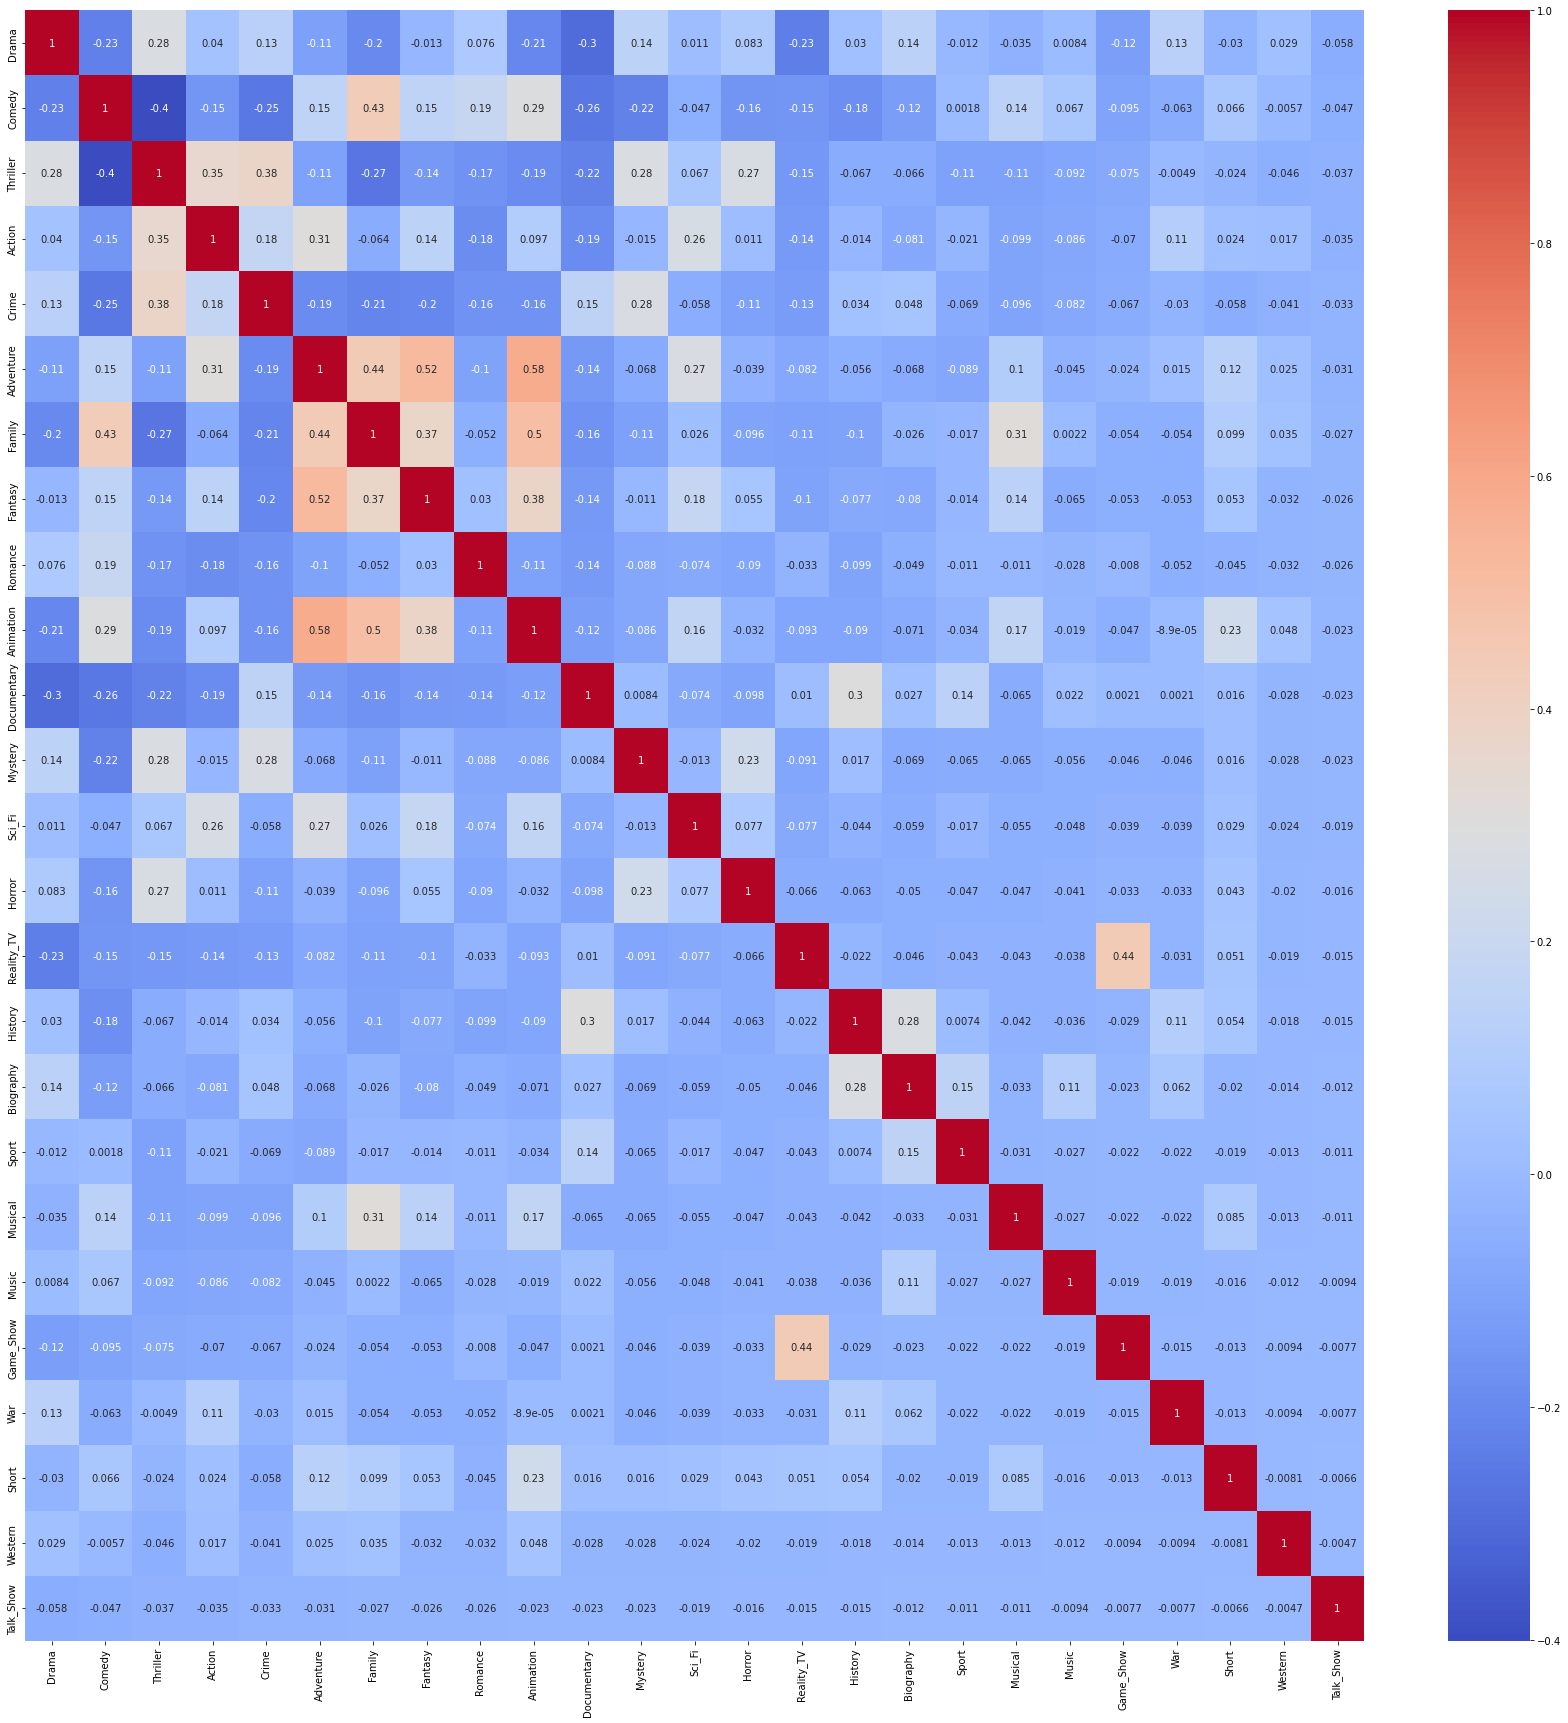

In [21]:
corr = df_genres.corr()

fig, ax = plt.subplots(figsize=(30,30)) 

sns.heatmap(corr, cmap="coolwarm", annot=True)

In [22]:
genres_df = scaled_df_genres
genres_df.head()

,Drama,Comedy,Thriller,Action,Crime,Adventure,Family,Fantasy,Romance,Animation,...,History,Biography,Sport,Musical,Music,Game_Show,War,Short,Western,Talk_Show
0,-0.946406,-0.766387,-0.604388,-0.560548,1.851640,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,5.317685,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
1,1.056629,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,-0.188052,5.651327,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
2,1.056629,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,4.221543,5.317685,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
3,-0.946406,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,2.399252,-0.378374,...,-0.236880,-0.188052,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
4,1.056629,1.304823,1.654566,1.783967,1.851640,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,-0.188052,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721


## 6. Check ratings by consumer segment
**Steps:**
1. Fill NULL values
2. Standardize data
3. Check for multicollinearity
4. Run PCA
<br>

[Back: Table of contents](#Table-of-contents)

In [23]:
#Create separate dataframe for ratings by consumer segment

df_ratings = df.loc[:,'imdb_users_rating':]
df_ratings.head()

,imdb_users_rating,aged_under_18_rating,aged_18_29_rating,aged_30_44_rating,aged_45_plus_rating,males_rating,males_aged_under_18_rating,males_aged_18_29_rating,males_aged_30_44_rating,males_aged_45_plus_rating,females_rating,females_aged_under_18_rating,females_aged_18_29_rating,females_aged_30_44_rating,females_aged_45_plus_rating,top_1000_voters_rating,us_users_rating,non_us_users_rating
0,7.5,7.7,7.6,7.5,7.3,7.6,7.8,7.7,7.6,7.3,7.4,7.3,7.5,7.4,7.1,7.2,7.6,7.5
1,7.6,6.6,7.9,7.6,7.0,7.3,6.2,7.9,7.3,6.6,8.0,6.5,8.0,8.0,7.9,5.9,7.6,7.1
2,7.3,7.2,7.3,7.3,7.4,7.1,8.0,7.0,7.1,7.2,7.5,6.4,7.4,7.4,7.7,6.3,7.4,7.2
3,6.1,6.1,5.9,6.2,6.1,5.9,7.0,5.6,6.0,5.7,6.3,5.9,6.1,6.4,6.6,4.1,6.1,6.0
4,6.2,5.8,6.2,6.2,6.3,6.2,5.7,6.2,6.1,6.3,6.4,5.2,6.3,6.4,6.8,5.8,6.3,6.1


In [24]:
df_ratings.isna().sum()

imdb_users_rating                0
aged_under_18_rating            35
aged_18_29_rating                0
aged_30_44_rating                0
aged_45_plus_rating              0
males_rating                     0
males_aged_under_18_rating      86
males_aged_18_29_rating          0
males_aged_30_44_rating          0
males_aged_45_plus_rating        0
females_rating                   0
females_aged_under_18_rating    94
females_aged_18_29_rating        1
females_aged_30_44_rating        0
females_aged_45_plus_rating      0
top_1000_voters_rating           0
us_users_rating                  0
non_us_users_rating              0
dtype: int64

In [25]:
df_ratings = df_ratings.fillna(0)
df_ratings.isna().sum()

imdb_users_rating               0
aged_under_18_rating            0
aged_18_29_rating               0
aged_30_44_rating               0
aged_45_plus_rating             0
males_rating                    0
males_aged_under_18_rating      0
males_aged_18_29_rating         0
males_aged_30_44_rating         0
males_aged_45_plus_rating       0
females_rating                  0
females_aged_under_18_rating    0
females_aged_18_29_rating       0
females_aged_30_44_rating       0
females_aged_45_plus_rating     0
top_1000_voters_rating          0
us_users_rating                 0
non_us_users_rating             0
dtype: int64

In [26]:
#define scaler
scaler_r = StandardScaler(with_mean=False,with_std=False) 

#create copy of DataFrame
scaled_df_ratings=df_ratings.copy()

#created scaled version of DataFrame
scaled_df_ratings=pd.DataFrame(scaler_r.fit_transform(scaled_df_ratings), columns=scaled_df_ratings.columns)

#check shape
scaled_df_ratings.shape

(527, 18)

In [27]:
#Check dataframe
scaled_df_ratings.head()

,imdb_users_rating,aged_under_18_rating,aged_18_29_rating,aged_30_44_rating,aged_45_plus_rating,males_rating,males_aged_under_18_rating,males_aged_18_29_rating,males_aged_30_44_rating,males_aged_45_plus_rating,females_rating,females_aged_under_18_rating,females_aged_18_29_rating,females_aged_30_44_rating,females_aged_45_plus_rating,top_1000_voters_rating,us_users_rating,non_us_users_rating
0,7.5,7.7,7.6,7.5,7.3,7.6,7.8,7.7,7.6,7.3,7.4,7.3,7.5,7.4,7.1,7.2,7.6,7.5
1,7.6,6.6,7.9,7.6,7.0,7.3,6.2,7.9,7.3,6.6,8.0,6.5,8.0,8.0,7.9,5.9,7.6,7.1
2,7.3,7.2,7.3,7.3,7.4,7.1,8.0,7.0,7.1,7.2,7.5,6.4,7.4,7.4,7.7,6.3,7.4,7.2
3,6.1,6.1,5.9,6.2,6.1,5.9,7.0,5.6,6.0,5.7,6.3,5.9,6.1,6.4,6.6,4.1,6.1,6.0
4,6.2,5.8,6.2,6.2,6.3,6.2,5.7,6.2,6.1,6.3,6.4,5.2,6.3,6.4,6.8,5.8,6.3,6.1


In [28]:
# Check genres for multicollinearity with Variance Inflation Factor

vif_ratings = pd.DataFrame()
vif_ratings["feature"] = scaled_df_ratings.columns
  
# calculating VIF for each feature
vif_ratings["VIF"] = [variance_inflation_factor(scaled_df_ratings.values, i)
                          for i in range(len(scaled_df_ratings.columns))]
  
print(vif_ratings.sort_values(by='VIF', ascending=False), end='\n\n')
print('VIF values show signs of multicollinearity')

                         feature           VIF
5                   males_rating  14301.349320
3              aged_30_44_rating  11042.320473
8        males_aged_30_44_rating   8817.790473
4            aged_45_plus_rating   7199.086470
0              imdb_users_rating   5913.424248
10                females_rating   4970.711223
9      males_aged_45_plus_rating   4827.948487
17           non_us_users_rating   4654.148794
2              aged_18_29_rating   3808.642620
13     females_aged_30_44_rating   3175.500718
7        males_aged_18_29_rating   2566.957555
16               us_users_rating   1840.434056
14   females_aged_45_plus_rating    600.639097
12     females_aged_18_29_rating    559.931600
15        top_1000_voters_rating    139.172323
1           aged_under_18_rating     21.487186
6     males_aged_under_18_rating      9.945486
11  females_aged_under_18_rating      7.153119

VIF values show signs of multicollinearity


In [29]:
#define PCA model to use
pca_ratings = PCA(n_components=18)

#fit PCA model to data
pca_fit_ratings = pca_ratings.fit_transform(scaled_df_ratings)

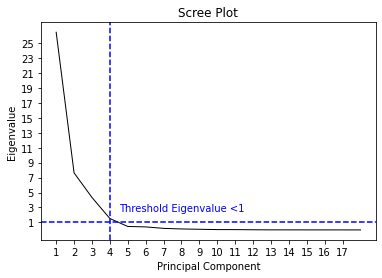

In [30]:
#Create Scree plot
PC_values = np.arange(pca_ratings.n_components_) + 1
plt.plot(PC_values, pca_ratings.explained_variance_, linewidth=1, color='black')
plt.xticks(np.arange(1, 18, step=1))
plt.yticks(np.arange(1, 26, step=2))
plt.axhline(y=1, color='blue', linestyle='--')
plt.axvline(x=4, color='blue', linestyle='--')
plt.text(4.5, 2.5, 'Threshold Eigenvalue <1', color = 'blue', fontsize=10)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [31]:
#Check eigenvalues for PC 1-5
pca_ratings.explained_variance_[:5]

array([26.43839507,  7.63292512,  4.34104663,  1.5247847 ,  0.46322139])

In [32]:
#define new PCA model to use
pca_ratings2 = PCA(n_components=4)

#fit PCA model to data
pca_fit_ratings2 = pca_ratings2.fit_transform(scaled_df_ratings)

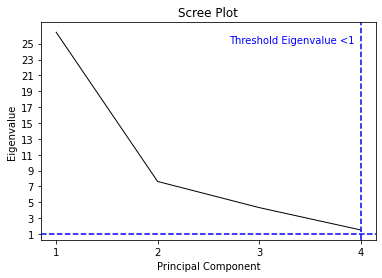

In [33]:
#Create Scree plot
PC_values = np.arange(pca_ratings2.n_components_) + 1
plt.plot(PC_values, pca_ratings2.explained_variance_, linewidth=1, color='black')
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(1, 26, step=2))
plt.axhline(y=1, color='blue', linestyle='--')
plt.axvline(x=4, color='blue', linestyle='--')
plt.text(2.7, 25, 'Threshold Eigenvalue <1', color = 'blue', fontsize=10)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [34]:
#Check explained variance ratio for each PC
for pcr in enumerate(np.cumsum(pca_ratings2.explained_variance_ratio_)):
    print (pcr)

(0, 0.6390016874181464)
(1, 0.8234853528266588)
(2, 0.9284060982590876)
(3, 0.9652593184348036)


In [35]:
#Check loadings for each segment
loadings2 = pca_ratings2.components_.T * np.sqrt(pca_ratings2.explained_variance_)

columns=['R1','R2','R3','R4']

loading_matrix2 = pd.DataFrame(loadings2, index=df_ratings.columns,columns=columns)
loading_matrix2.head(20)

,R1,R2,R3,R4
imdb_users_rating,-1.013103,0.502039,-0.044846,0.006046
aged_under_18_rating,-1.806298,-0.905883,0.176662,1.073709
aged_18_29_rating,-1.068583,0.513723,-0.057560,-0.005215
aged_30_44_rating,-1.007840,0.509243,-0.043842,-0.005350
aged_45_plus_rating,-0.961772,0.437175,-0.008291,-0.025010
males_rating,-1.034190,0.486057,-0.016455,-0.006656
males_aged_under_18_rating,-2.093825,-1.202646,1.445686,-0.485279
males_aged_18_29_rating,-1.086006,0.520227,-0.034767,0.024007
males_aged_30_44_rating,-1.024718,0.498841,-0.017204,-0.007770
males_aged_45_plus_rating,-0.976624,0.413055,0.016043,-0.011762


In [36]:
#Put Principal Components into dataframe
columns=['R1','R2','R3','R4']
pca_fit_ratings2 = pd.DataFrame(data = pca_fit_ratings2,columns=columns)
ratings_df = pca_fit_ratings2
ratings_df.head()

,R1,R2,R3,R4
0,-5.474979,-0.528314,-0.013581,-0.097854
1,-4.122706,1.061132,-0.758882,-0.197591
2,-4.394604,-0.489461,0.728649,-0.362767
3,0.369288,-2.607386,0.536689,-0.464908
4,0.371312,-0.926887,0.110637,-0.148372


In [37]:
ratings_df.shape

(527, 4)

## 7. Check all dataframes
1. Social Tags
2. Genres
3. Ratings by consumer segment
<br>

[Back: Table of contents](#Table-of-contents)

In [38]:
tags_df.head()

,T1,T2,T3,T4,T5
0,-1.012896,-0.363969,-0.049836,-0.046033,-0.248076
1,-0.916637,-0.024111,-0.085391,0.049812,0.033730
2,-1.098297,-0.387206,-0.074375,0.007175,-0.157390
3,-1.112076,-0.301301,-0.053251,-0.033204,-0.109063
4,7.597362,-0.250368,-2.279508,-1.040644,-1.272990


In [39]:
genres_df.head()

,Drama,Comedy,Thriller,Action,Crime,Adventure,Family,Fantasy,Romance,Animation,...,History,Biography,Sport,Musical,Music,Game_Show,War,Short,Western,Talk_Show
0,-0.946406,-0.766387,-0.604388,-0.560548,1.851640,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,5.317685,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
1,1.056629,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,-0.188052,5.651327,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
2,1.056629,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,4.221543,5.317685,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
3,-0.946406,-0.766387,-0.604388,-0.560548,-0.540062,-0.501778,-0.438529,-0.426162,2.399252,-0.378374,...,-0.236880,-0.188052,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721
4,1.056629,1.304823,1.654566,1.783967,1.851640,-0.501778,-0.438529,-0.426162,-0.416797,-0.378374,...,-0.236880,-0.188052,-0.176950,-0.17695,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721


In [40]:
ratings_df.head()

,R1,R2,R3,R4
0,-5.474979,-0.528314,-0.013581,-0.097854
1,-4.122706,1.061132,-0.758882,-0.197591
2,-4.394604,-0.489461,0.728649,-0.362767
3,0.369288,-2.607386,0.536689,-0.464908
4,0.371312,-0.926887,0.110637,-0.148372


## 8. Create new dataframe for Cox PH analysis
**Steps:**
1. Drop all columns that were used previously (e.g. PCA)
2. Concat all dataframes
<br>

[Back: Table of contents](#Table-of-contents)

In [41]:
df = pd.read_excel('netflix_data.xlsx')
df.head()

,Unnamed: 0,Title_URL,Title,Type,Netflix_exclusive,Netflix_Release_Date_Day,Initial_Rank,n_days_chart,n_genres,n_keywords,...,males_aged_30_44_rating,males_aged_45_plus_rating,females_rating,females_aged_under_18_rating,females_aged_18_29_rating,females_aged_30_44_rating,females_aged_45_plus_rating,top_1000_voters_rating,us_users_rating,non_us_users_rating
0,0,https://www.the-numbers.com/tv-show/Tiger-King...,"Tiger King: Murder, Mayhem …",TV Show,1,Friday,one,35,3,35,...,7.6,7.3,7.4,7.3,7.5,7.4,7.1,7.2,7.6,7.5
1,1,https://www.the-numbers.com/tv-show/All-Americ...,All American,TV Show,0,Thursday,two,66,2,14,...,7.3,6.6,8.0,6.5,8.0,8.0,7.9,5.9,7.6,7.1
2,2,https://www.the-numbers.com/tv-show/Self-Made-...,Self Made: Inspired by the …,TV Show,1,Friday,three,7,3,2,...,7.1,7.2,7.5,6.4,7.4,7.4,7.7,6.3,7.4,7.2
3,3,https://www.the-numbers.com/tv-show/Love-is-Bl...,Love is Blind,TV Show,1,Thursday,four,18,2,6,...,6.0,5.7,6.3,5.9,6.1,6.4,6.6,4.1,6.1,6.0
4,4,https://www.the-numbers.com/movie/Spenser-Conf...,Spenser Confidential,Movie,1,Friday,five,3,6,296,...,6.1,6.3,6.4,5.2,6.3,6.4,6.8,5.8,6.3,6.1


In [42]:
#Drop columns and then check new dataframe
df = df.drop(df.loc[:,'netflix_original':],axis=1, inplace=False)
df.head()

,Unnamed: 0,Title_URL,Title,Type,Netflix_exclusive,Netflix_Release_Date_Day,Initial_Rank,n_days_chart,n_genres,n_keywords,rating,censored
0,0,https://www.the-numbers.com/tv-show/Tiger-King...,"Tiger King: Murder, Mayhem …",TV Show,1,Friday,one,35,3,35,7.5,1
1,1,https://www.the-numbers.com/tv-show/All-Americ...,All American,TV Show,0,Thursday,two,66,2,14,7.6,1
2,2,https://www.the-numbers.com/tv-show/Self-Made-...,Self Made: Inspired by the …,TV Show,1,Friday,three,7,3,2,7.3,1
3,3,https://www.the-numbers.com/tv-show/Love-is-Bl...,Love is Blind,TV Show,1,Thursday,four,18,2,6,6.1,1
4,4,https://www.the-numbers.com/movie/Spenser-Conf...,Spenser Confidential,Movie,1,Friday,five,3,6,296,6.2,1


In [43]:
#Concat all dataframes
df = pd.concat([df, tags_df, genres_df, ratings_df], axis=1)
df.columns

Index(['Unnamed: 0', 'Title_URL', 'Title', 'Type', 'Netflix_exclusive',
       'Netflix_Release_Date_Day', 'Initial_Rank', 'n_days_chart', 'n_genres',
       'n_keywords', 'rating', 'censored', 'T1', 'T2', 'T3', 'T4', 'T5',
       'Drama', 'Comedy', 'Thriller', 'Action', 'Crime', 'Adventure', 'Family',
       'Fantasy', 'Romance', 'Animation', 'Documentary', 'Mystery', 'Sci_Fi',
       'Horror', 'Reality_TV', 'History', 'Biography', 'Sport', 'Musical',
       'Music', 'Game_Show', 'War', 'Short', 'Western', 'Talk_Show', 'R1',
       'R2', 'R3', 'R4'],
      dtype='object')

In [44]:
#Check shape of new dataframe
df.shape

(527, 46)

In [45]:
#Check dataframe
df.head()

,Unnamed: 0,Title_URL,Title,Type,Netflix_exclusive,Netflix_Release_Date_Day,Initial_Rank,n_days_chart,n_genres,n_keywords,...,Music,Game_Show,War,Short,Western,Talk_Show,R1,R2,R3,R4
0,0,https://www.the-numbers.com/tv-show/Tiger-King...,"Tiger King: Murder, Mayhem …",TV Show,1,Friday,one,35,3,35,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,-5.474979,-0.528314,-0.013581,-0.097854
1,1,https://www.the-numbers.com/tv-show/All-Americ...,All American,TV Show,0,Thursday,two,66,2,14,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,-4.122706,1.061132,-0.758882,-0.197591
2,2,https://www.the-numbers.com/tv-show/Self-Made-...,Self Made: Inspired by the …,TV Show,1,Friday,three,7,3,2,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,-4.394604,-0.489461,0.728649,-0.362767
3,3,https://www.the-numbers.com/tv-show/Love-is-Bl...,Love is Blind,TV Show,1,Thursday,four,18,2,6,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,0.369288,-2.607386,0.536689,-0.464908
4,4,https://www.the-numbers.com/movie/Spenser-Conf...,Spenser Confidential,Movie,1,Friday,five,3,6,296,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,0.371312,-0.926887,0.110637,-0.148372


## 9. Descriptive Statistics
<br>

[Back: Table of contents](#Table-of-contents)

### <font color='Blue'>Distribution Plots:</font>

       n_days_chart
count    527.000000
mean      10.466793
std       17.306737
min        1.000000
25%        4.000000
50%        7.000000
75%       11.000000
max      334.000000



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


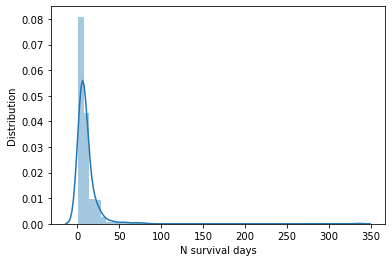

         n_genres
count  527.000000
mean     3.037951
std      1.479416
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max     11.000000



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


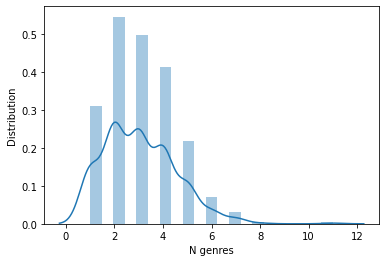

       n_keywords
count  527.000000
mean    73.240987
std    108.813043
min      1.000000
25%      8.000000
50%     25.000000
75%     83.500000
max    788.000000



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


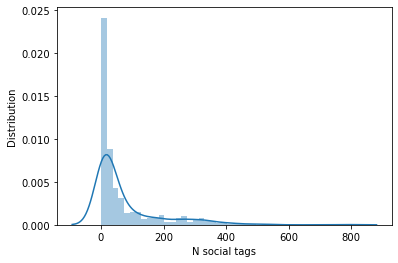

           rating
count  527.000000
mean     6.541746
std      1.140210
min      2.900000
25%      5.800000
50%      6.600000
75%      7.300000
max      9.300000



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


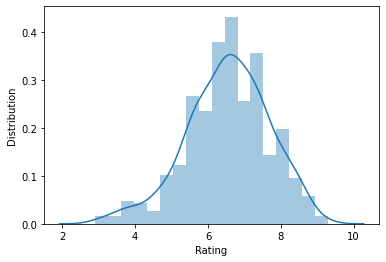

In [46]:
print(df[['n_days_chart']].describe())
print()

ax = sns.distplot(df["n_days_chart"])
ax.set(xlabel='N survival days', ylabel='Distribution')
plt.show()

print(df[['n_genres']].describe())
print()

ax = sns.distplot(df["n_genres"])
ax.set(xlabel='N genres', ylabel='Distribution')
plt.show()

print(df[['n_keywords']].describe())
print()

ax = sns.distplot(df["n_keywords"])
ax.set(xlabel='N social tags', ylabel='Distribution')
plt.show()

print(df[['rating']].describe())
print()

ax = sns.distplot(df["rating"])
ax.set(xlabel='Rating', ylabel='Distribution')
plt.show()

### <font color='Blue'>Boxplots (with outliers):</font>

n_days_chart vs Type with outliers


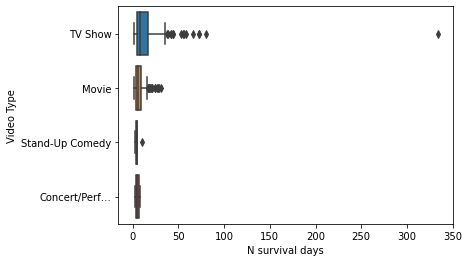

       Type           
count  Concert/Perf…        2.000000
       Movie              289.000000
       Stand-Up Comedy      6.000000
       TV Show            230.000000
mean   Concert/Perf…        5.000000
       Movie                7.245675
       Stand-Up Comedy      4.833333
       TV Show             14.708696
std    Concert/Perf…        4.242641
       Movie                4.870389
       Stand-Up Comedy      2.786874
       TV Show             25.012965
min    Concert/Perf…        2.000000
       Movie                1.000000
       Stand-Up Comedy      2.000000
       TV Show              1.000000
25%    Concert/Perf…        3.500000
       Movie                4.000000
       Stand-Up Comedy      3.250000
       TV Show              5.000000
50%    Concert/Perf…        5.000000
       Movie                6.000000
       Stand-Up Comedy      4.500000
       TV Show              8.000000
75%    Concert/Perf…        6.500000
       Movie                9.000000
       Stand-Up

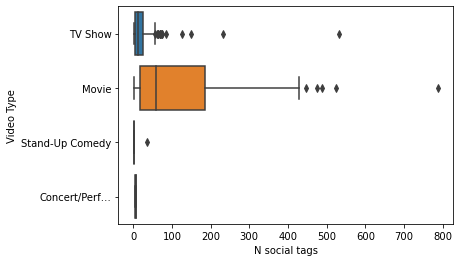

       Type           
count  Concert/Perf…        2.000000
       Movie              289.000000
       Stand-Up Comedy      6.000000
       TV Show            230.000000
mean   Concert/Perf…        6.000000
       Movie              116.034602
       Stand-Up Comedy      7.833333
       TV Show             21.760870
std    Concert/Perf…        2.828427
       Movie              127.047777
       Stand-Up Comedy     13.317908
       TV Show             42.051219
min    Concert/Perf…        4.000000
       Movie                1.000000
       Stand-Up Comedy      2.000000
       TV Show              1.000000
25%    Concert/Perf…        5.000000
       Movie               18.000000
       Stand-Up Comedy      2.000000
       TV Show              4.000000
50%    Concert/Perf…        6.000000
       Movie               60.000000
       Stand-Up Comedy      2.500000
       TV Show             12.000000
75%    Concert/Perf…        7.000000
       Movie              186.000000
       Stand-Up

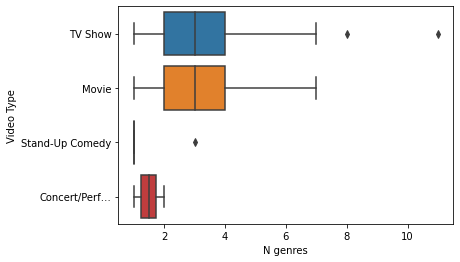

       Type           
count  Concert/Perf…        2.000000
       Movie              289.000000
       Stand-Up Comedy      6.000000
       TV Show            230.000000
mean   Concert/Perf…        1.500000
       Movie                3.224913
       Stand-Up Comedy      1.333333
       TV Show              2.860870
std    Concert/Perf…        0.707107
       Movie                1.409763
       Stand-Up Comedy      0.816497
       TV Show              1.529260
min    Concert/Perf…        1.000000
       Movie                1.000000
       Stand-Up Comedy      1.000000
       TV Show              1.000000
25%    Concert/Perf…        1.250000
       Movie                2.000000
       Stand-Up Comedy      1.000000
       TV Show              2.000000
50%    Concert/Perf…        1.500000
       Movie                3.000000
       Stand-Up Comedy      1.000000
       TV Show              3.000000
75%    Concert/Perf…        1.750000
       Movie                4.000000
       Stand-Up

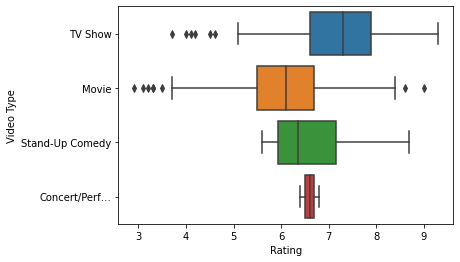

In [47]:
print("n_days_chart vs Type with outliers")
ax = sns.boxplot(x=df["n_days_chart"], y=df["Type"], data=df, showfliers = True)
ax.set(xlabel='N survival days', ylabel='Video Type')
plt.show()

print(df.groupby("Type").n_days_chart.describe().unstack())
print()

print("n_keywords vs Type with outliers")
ax = sns.boxplot(x=df["n_keywords"], y=df["Type"], data=df, showfliers = True)
ax.set(xlabel='N social tags', ylabel='Video Type')
plt.show()

print(df.groupby("Type").n_keywords.describe().unstack())
print()

print("n_genres vs Type with outliers")
ax = sns.boxplot(x=df["n_genres"], y=df["Type"], data=df, showfliers = True)
ax.set(xlabel='N genres', ylabel='Video Type')
plt.show()

print(df.groupby("Type").n_genres.describe().unstack())
print()

print("rating vs Type with outliers")
ax = sns.boxplot(x=df["rating"], y=df["Type"], data=df, showfliers = True)
ax.set(xlabel='Rating', ylabel='Video Type')
plt.show()

### <font color='Blue'>Boxplots (excl. outliers):</font>

n_days_chart vs Type excl. outliers


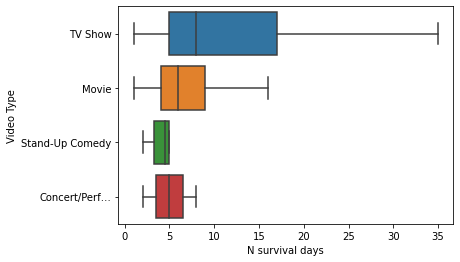

       Type           
count  Concert/Perf…        2.000000
       Movie              289.000000
       Stand-Up Comedy      6.000000
       TV Show            230.000000
mean   Concert/Perf…        5.000000
       Movie                7.245675
       Stand-Up Comedy      4.833333
       TV Show             14.708696
std    Concert/Perf…        4.242641
       Movie                4.870389
       Stand-Up Comedy      2.786874
       TV Show             25.012965
min    Concert/Perf…        2.000000
       Movie                1.000000
       Stand-Up Comedy      2.000000
       TV Show              1.000000
25%    Concert/Perf…        3.500000
       Movie                4.000000
       Stand-Up Comedy      3.250000
       TV Show              5.000000
50%    Concert/Perf…        5.000000
       Movie                6.000000
       Stand-Up Comedy      4.500000
       TV Show              8.000000
75%    Concert/Perf…        6.500000
       Movie                9.000000
       Stand-Up

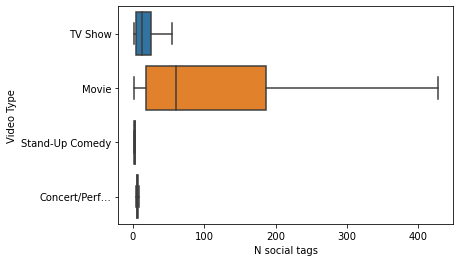

       Type           
count  Concert/Perf…        2.000000
       Movie              289.000000
       Stand-Up Comedy      6.000000
       TV Show            230.000000
mean   Concert/Perf…        6.000000
       Movie              116.034602
       Stand-Up Comedy      7.833333
       TV Show             21.760870
std    Concert/Perf…        2.828427
       Movie              127.047777
       Stand-Up Comedy     13.317908
       TV Show             42.051219
min    Concert/Perf…        4.000000
       Movie                1.000000
       Stand-Up Comedy      2.000000
       TV Show              1.000000
25%    Concert/Perf…        5.000000
       Movie               18.000000
       Stand-Up Comedy      2.000000
       TV Show              4.000000
50%    Concert/Perf…        6.000000
       Movie               60.000000
       Stand-Up Comedy      2.500000
       TV Show             12.000000
75%    Concert/Perf…        7.000000
       Movie              186.000000
       Stand-Up

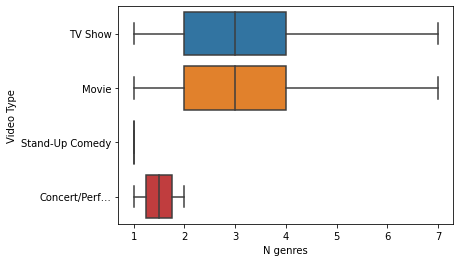

       Type           
count  Concert/Perf…        2.000000
       Movie              289.000000
       Stand-Up Comedy      6.000000
       TV Show            230.000000
mean   Concert/Perf…        1.500000
       Movie                3.224913
       Stand-Up Comedy      1.333333
       TV Show              2.860870
std    Concert/Perf…        0.707107
       Movie                1.409763
       Stand-Up Comedy      0.816497
       TV Show              1.529260
min    Concert/Perf…        1.000000
       Movie                1.000000
       Stand-Up Comedy      1.000000
       TV Show              1.000000
25%    Concert/Perf…        1.250000
       Movie                2.000000
       Stand-Up Comedy      1.000000
       TV Show              2.000000
50%    Concert/Perf…        1.500000
       Movie                3.000000
       Stand-Up Comedy      1.000000
       TV Show              3.000000
75%    Concert/Perf…        1.750000
       Movie                4.000000
       Stand-Up

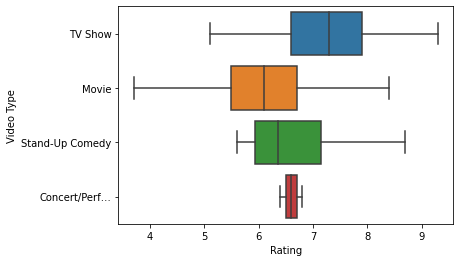

In [48]:
print("n_days_chart vs Type excl. outliers")
ax = sns.boxplot(x=df["n_days_chart"], y=df["Type"], data=df, showfliers = False)
ax.set(xlabel='N survival days', ylabel='Video Type')
plt.show()

print(df.groupby("Type").n_days_chart.describe().unstack())
print()

print("n_keywords vs Type excl. outliers")
ax = sns.boxplot(x=df["n_keywords"], y=df["Type"], data=df, showfliers = False)
ax.set(xlabel='N social tags', ylabel='Video Type')
plt.show()

print(df.groupby("Type").n_keywords.describe().unstack())
print()

print("n_genres vs Type excl. outliers")
ax = sns.boxplot(x=df["n_genres"], y=df["Type"], data=df, showfliers = False)
ax.set(xlabel='N genres', ylabel='Video Type')
plt.show()

print(df.groupby("Type").n_genres.describe().unstack())
print()

print("rating vs Type excl. outliers")
ax = sns.boxplot(x=df["rating"], y=df["Type"], data=df, showfliers = False)
ax.set(xlabel='Rating', ylabel='Video Type')
plt.show()

### <font color='Blue'>Scatterplots:</font>

n_days_chart vs n_keywords per type


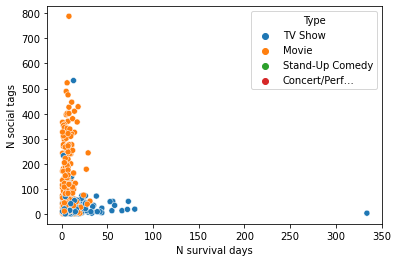

n_days_chart vs n_keywords per type


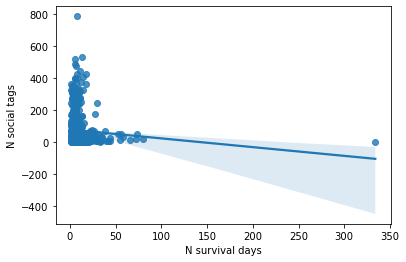

n_days_chart vs n_genres per type


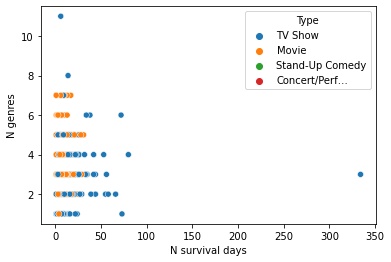

n_days_chart vs n_genres per type


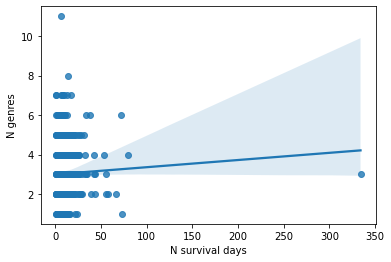

n_genres vs n_keywords per type


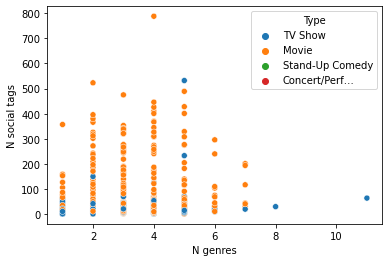

n_genres vs n_keywords per type


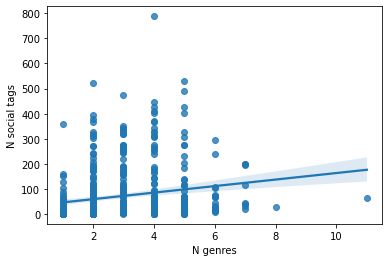

n_days_chart vs rating per type


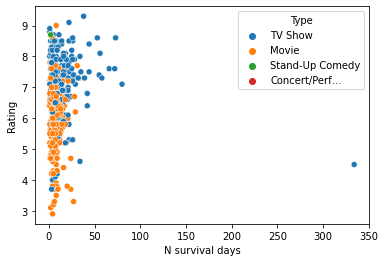

n_days_chart vs rating per type


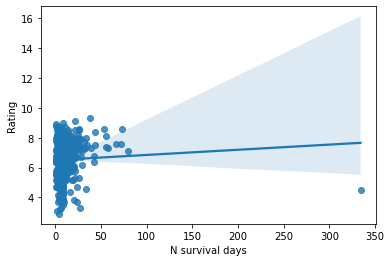

n_genres vs rating per type


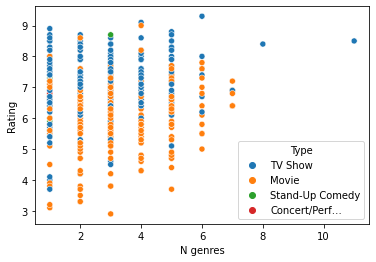

n_genres vs rating per type


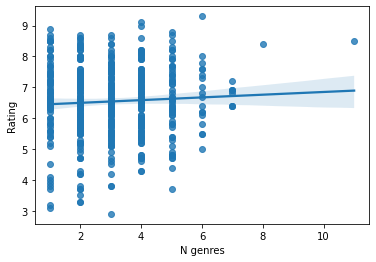

n_keywords vs rating per type


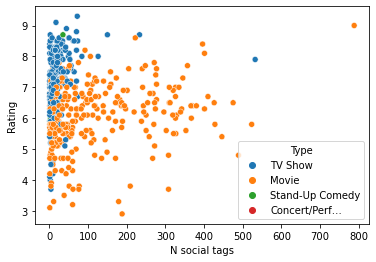

n_keywords vs rating per type


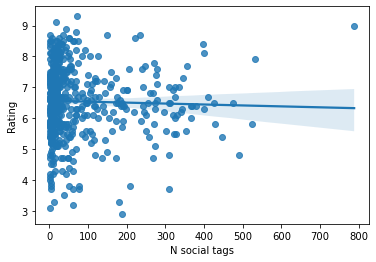

In [49]:
print("n_days_chart vs n_keywords per type")
ax = sns.scatterplot(data=df, x=df["n_days_chart"], y=df["n_keywords"], hue=df["Type"])
ax.set(xlabel='N survival days', ylabel='N social tags')

#add annotation - commented because too many labels
#for i in range(df.shape[0]):
#    plt.text(x=df.n_days_chart[i]+0.3,y=df.n_keywords[i]+0.3,s=df.Title[i])

plt.show()

print("n_days_chart vs n_keywords per type")
ax = sns.regplot(data=df, x=df["n_days_chart"], y=df["n_keywords"])
ax.set(xlabel='N survival days', ylabel='N social tags')
plt.show()

print("n_days_chart vs n_genres per type")
ax = sns.scatterplot(data=df, x=df["n_days_chart"], y=df["n_genres"], hue=df["Type"])
ax.set(xlabel='N survival days', ylabel='N genres')
plt.show()

print("n_days_chart vs n_genres per type")
ax = sns.regplot(data=df, x=df["n_days_chart"], y=df["n_genres"])
ax.set(xlabel='N survival days', ylabel='N genres')
plt.show()

print("n_genres vs n_keywords per type")
ax = sns.scatterplot(data=df, x=df["n_genres"], y=df["n_keywords"], hue=df["Type"])
ax.set(xlabel='N genres', ylabel='N social tags')
plt.show()

print("n_genres vs n_keywords per type")
ax = sns.regplot(data=df, x=df["n_genres"], y=df["n_keywords"])
ax.set(xlabel='N genres', ylabel='N social tags')
plt.show()

print("n_days_chart vs rating per type")
ax = sns.scatterplot(data=df, x=df["n_days_chart"], y=df["rating"], hue=df["Type"])
ax.set(xlabel='N survival days', ylabel='Rating')
plt.show()

print("n_days_chart vs rating per type")
ax = sns.regplot(data=df, x=df["n_days_chart"], y=df["rating"])
ax.set(xlabel='N survival days', ylabel='Rating')
plt.show()

print("n_genres vs rating per type")
ax = sns.scatterplot(data=df, x=df["n_genres"], y=df["rating"], hue=df["Type"])
ax.set(xlabel='N genres', ylabel='Rating')
plt.show()

print("n_genres vs rating per type")
ax = sns.regplot(data=df, x=df["n_genres"], y=df["rating"])
ax.set(xlabel='N genres', ylabel='Rating')
plt.show()

print("n_keywords vs rating per type")
ax = sns.scatterplot(data=df, x=df["n_keywords"], y=df["rating"], hue=df["Type"])
ax.set(xlabel='N social tags', ylabel='Rating')
plt.show()

print("n_keywords vs rating per type")
ax = sns.regplot(data=df, x=df["n_keywords"], y=df["rating"])
ax.set(xlabel='N social tags', ylabel='Rating')
plt.show()

## 10. Cox PH Model 1
<font color='Red'>**This Cox PH Model includes all variables**</font>
<br>

[Back: Table of contents](#Table-of-contents)

In [50]:
#Drop columns not needed for analyis

df_final = df.drop(df.iloc[:,:3],axis=1, inplace=False)
df_final.columns

Index(['Type', 'Netflix_exclusive', 'Netflix_Release_Date_Day', 'Initial_Rank',
       'n_days_chart', 'n_genres', 'n_keywords', 'rating', 'censored', 'T1',
       'T2', 'T3', 'T4', 'T5', 'Drama', 'Comedy', 'Thriller', 'Action',
       'Crime', 'Adventure', 'Family', 'Fantasy', 'Romance', 'Animation',
       'Documentary', 'Mystery', 'Sci_Fi', 'Horror', 'Reality_TV', 'History',
       'Biography', 'Sport', 'Musical', 'Music', 'Game_Show', 'War', 'Short',
       'Western', 'Talk_Show', 'R1', 'R2', 'R3', 'R4'],
      dtype='object')

In [51]:
#Note1: If n_genres added, then Cox PH stops - Warning: High collinearity
#Note2: Although n_keywords makes e.g. T2 more significant, but this variable results into 0 Beta

cph1 = CoxPHFitter()
cph1.fit(df_final, duration_col='n_days_chart', show_progress=False, event_col='censored', formula = "Type+Netflix_exclusive+Netflix_Release_Date_Day+Initial_Rank+T1+T2+T3+T4+T5+Drama+Comedy+Thriller+Action+Crime+Adventure+Family+Fantasy+Romance+Animation+Documentary+Mystery+Sci_Fi+Horror+Reality_TV+History+Biography+Sport+Musical+Music+Game_Show+War+Short+Western+Talk_Show+R1+R2+R3+R4")

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>

In [52]:
cph1.print_summary(decimals=3)

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>
             duration col = 'n_days_chart'
                event col = 'censored'
      baseline estimation = breslow
   number of observations = 527
number of events observed = 517
   partial log-likelihood = -2598.728
         time fit was run = 2022-01-03 18:31:24 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
Action                                 0.087      1.091      0.064           -0.039            0.213                0.962                1.238
Adventure                              0.157      1.169      0.072            0.015            0.298                1.015                1.347
Animation                             -0.011      0.989      0.070           -0.148            0.126                0.862                1.134
Biography                              0.038      1.039      0.052           -0.063            0.139                0.939                1.149
Comedy                                 0.050      1.051      0.071           -0.090            0.189                0.914                1.209
Crime                                  0.031      1.032      0.061           -0.089            0.152                0.915                1.164
Documentary                            0.054      1.055      0.070           -0.084            0.191                0.920                1.211
Drama                                 -0.082      0.921      0.061           -0.202            0.037                0.817                1.038
Family                                -0.275      0.759      0.071           -0.415           -0.135                0.660                0.873
Fantasy                                0.055      1.057      0.058           -0.059            0.168                0.943                1.184
Game_Show                             -0.094      0.910      0.053           -0.197            0.009                0.821                1.009
History                               -0.019      0.981      0.052           -0.122            0.084                0.885                1.087
Horror                                 0.109      1.115      0.056           -0.000            0.217                1.000                1.243
Initial_Rank[T.five]                  -0.511      0.600      0.238           -0.978           -0.044                0.376                0.957
Initial_Rank[T.four]                  -0.886      0.412      0.245           -1.366           -0.406                0.255                0.666
Initial_Rank[T.nine]                  -0.041      0.960      0.220           -0.471            0.390                0.624                1.477
Initial_Rank[T.one]                   -1.484      0.227      0.230           -1.935           -1.033                0.144                0.356
Initial_Rank[T.seven]                 -0.165      0.848      0.218           -0.591            0.262                0.554                1.299
Initial_Rank[T.six]                   -0.379      0.685      0.219           -0.808            0.050                0.446                1.051
Initial_Rank[T.ten]                    0.210      1.234      0.206           -0.193            0.614                0.825                1.847
Initial_Rank[T.three]                 -0.751      0.472      0.220           -1.181           -0.320                0.307                0.726
Initial_Rank[T.two]                   -1.272      0.280      0.249           -1.761           -0.784                0.172                0.457
Music                                  0.049      1.051      0.047           -0.043            0.141                0.958                1.152
Musical                               -0.094      0.911 

In [53]:
cph1.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 53
        test_name = log-likelihood ratio test

---
 test_statistic      p  -log2(p)
         263.81 <0.005     96.41

<AxesSubplot:>

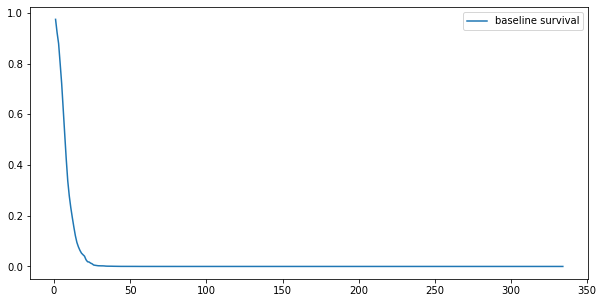

In [54]:
cph1.baseline_survival_.plot(figsize=(10,5))

## 11. Cox PH Model 2
<font color='Red'>**This Cox PH Model excl. ratings by consumer segment R1-R4**</font>
<br>

[Back: Table of contents](#Table-of-contents)

In [55]:
#Note1: If n_genres added, then Cox PH stops - Warning: High collinearity
#Note2: Although n_keywords makes e.g. T2 more significant, but this variable results into 0 Beta

cph2 = CoxPHFitter()
cph2.fit(df_final, duration_col='n_days_chart', show_progress=False, event_col='censored', formula = "Type+Netflix_exclusive+Netflix_Release_Date_Day+Initial_Rank+T1+T2+T3+T4+T5+Drama+Comedy+Thriller+Action+Crime+Adventure+Family+Fantasy+Romance+Animation+Documentary+Mystery+Sci_Fi+Horror+Reality_TV+History+Biography+Sport+Musical+Music+Game_Show+War+Short+Western+Talk_Show")

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>

In [56]:
cph2.print_summary(decimals=3)

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>
             duration col = 'n_days_chart'
                event col = 'censored'
      baseline estimation = breslow
   number of observations = 527
number of events observed = 517
   partial log-likelihood = -2608.806
         time fit was run = 2022-01-03 18:31:25 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
Action                                 0.102      1.107      0.064           -0.022            0.226                0.978                1.254
Adventure                              0.122      1.130      0.072           -0.020            0.263                0.981                1.301
Animation                              0.012      1.012      0.069           -0.124            0.147                0.883                1.159
Biography                              0.025      1.025      0.051           -0.076            0.125                0.927                1.133
Comedy                                 0.007      1.007      0.071           -0.132            0.146                0.876                1.157
Crime                                  0.001      1.001      0.060           -0.117            0.120                0.890                1.127
Documentary                            0.058      1.060      0.069           -0.077            0.193                0.926                1.213
Drama                                 -0.112      0.894      0.060           -0.230            0.005                0.795                1.005
Family                                -0.254      0.776      0.072           -0.395           -0.113                0.674                0.893
Fantasy                                0.032      1.032      0.058           -0.081            0.145                0.922                1.156
Game_Show                             -0.103      0.902      0.053           -0.207           -0.000                0.813                1.000
History                               -0.025      0.975      0.053           -0.128            0.078                0.880                1.081
Horror                                 0.100      1.106      0.056           -0.009            0.210                0.991                1.234
Initial_Rank[T.five]                  -0.546      0.579      0.238           -1.012           -0.079                0.363                0.924
Initial_Rank[T.four]                  -0.905      0.405      0.243           -1.382           -0.428                0.251                0.652
Initial_Rank[T.nine]                  -0.003      0.997      0.217           -0.429            0.423                0.651                1.526
Initial_Rank[T.one]                   -1.501      0.223      0.228           -1.947           -1.054                0.143                0.349
Initial_Rank[T.seven]                 -0.226      0.798      0.216           -0.649            0.198                0.522                1.218
Initial_Rank[T.six]                   -0.374      0.688      0.219           -0.804            0.056                0.448                1.058
Initial_Rank[T.ten]                    0.166      1.180      0.205           -0.235            0.566                0.790                1.762
Initial_Rank[T.three]                 -0.754      0.471      0.218           -1.181           -0.326                0.307                0.722
Initial_Rank[T.two]                   -1.279      0.278      0.249           -1.766           -0.791                0.171                0.454
Music                                  0.048      1.049      0.047           -0.044            0.139                0.957                1.150
Musical                               -0.075      0.927 

In [57]:
cph2.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 49
        test_name = log-likelihood ratio test

---
 test_statistic      p  -log2(p)
         243.66 <0.005     89.37

## 12. Cox PH Model 3
<font color='Red'>**This Cox PH Model includes all covariates but stratification on video type**</font>
<br>

[Back: Table of contents](#Table-of-contents)

In [58]:
#Note1: If n_genres added, then Cox PH stops - Warning: High collinearity
#Note2: Although n_keywords makes e.g. T2 more significant, but this variable results into 0 Beta

cph3 = CoxPHFitter()
cph3.fit(df_final, duration_col='n_days_chart', show_progress=False, event_col='censored', strata='Type', formula = "Netflix_exclusive+Netflix_Release_Date_Day+Initial_Rank+T1+T2+T3+T4+T5+Drama+Comedy+Thriller+Action+Crime+Adventure+Family+Fantasy+Romance+Animation+Documentary+Mystery+Sci_Fi+Horror+Reality_TV+History+Biography+Sport+Musical+Music+Game_Show+War+Short+Western+Talk_Show+R1+R2+R3+R4")

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>

In [59]:
cph3.print_summary(decimals=3)

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>
             duration col = 'n_days_chart'
                event col = 'censored'
                   strata = Type
      baseline estimation = breslow
   number of observations = 527
number of events observed = 517
   partial log-likelihood = -2236.735
         time fit was run = 2022-01-03 18:31:26 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
Action                                 0.096      1.101      0.065           -0.031            0.222                0.970                1.249
Adventure                              0.154      1.167      0.072            0.012            0.296                1.012                1.345
Animation                             -0.017      0.983      0.070           -0.155            0.121                0.856                1.129
Biography                              0.053      1.054      0.052           -0.049            0.155                0.953                1.167
Comedy                                 0.042      1.043      0.072           -0.098            0.183                0.907                1.200
Crime                                  0.035      1.035      0.061           -0.085            0.155                0.918                1.168
Documentary                            0.031      1.032      0.070           -0.106            0.169                0.900                1.184
Drama                                 -0.085      0.919      0.061           -0.204            0.035                0.816                1.035
Family                                -0.297      0.743      0.073           -0.439           -0.155                0.645                0.857
Fantasy                                0.050      1.051      0.058           -0.064            0.165                0.938                1.179
Game_Show                             -0.085      0.919      0.052           -0.187            0.018                0.829                1.018
History                               -0.025      0.975      0.052           -0.128            0.078                0.880                1.081
Horror                                 0.099      1.104      0.056           -0.010            0.208                0.990                1.232
Initial_Rank[T.five]                  -0.547      0.578      0.239           -1.015           -0.080                0.362                0.923
Initial_Rank[T.four]                  -0.886      0.412      0.246           -1.369           -0.404                0.254                0.668
Initial_Rank[T.nine]                  -0.096      0.908      0.221           -0.529            0.337                0.589                1.401
Initial_Rank[T.one]                   -1.584      0.205      0.234           -2.043           -1.124                0.130                0.325
Initial_Rank[T.seven]                 -0.188      0.829      0.218           -0.615            0.239                0.540                1.271
Initial_Rank[T.six]                   -0.402      0.669      0.219           -0.831            0.027                0.436                1.028
Initial_Rank[T.ten]                    0.175      1.191      0.206           -0.229            0.579                0.795                1.784
Initial_Rank[T.three]                 -0.764      0.466      0.220           -1.194           -0.333                0.303                0.717
Initial_Rank[T.two]                   -1.301      0.272      0.251           -1.794           -0.809                0.166                0.445
Music                                  0.041      1.042      0.047           -0.051            0.134                0.950                1.144
Musical                

In [60]:
cph3.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 50
        test_name = log-likelihood ratio test

---
 test_statistic      p  -log2(p)
         206.16 <0.005     66.87

<AxesSubplot:>

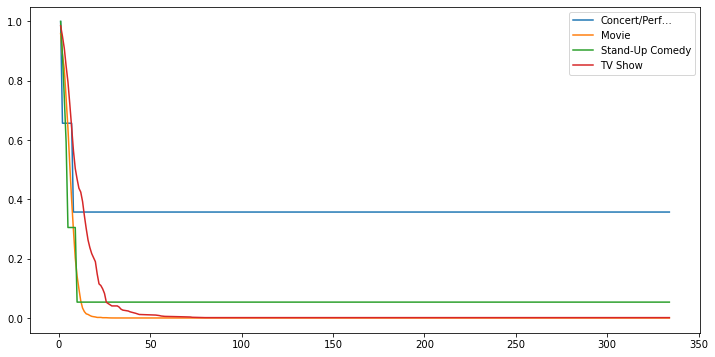

In [61]:
cph3.baseline_survival_.plot(figsize=(12,6))

<AxesSubplot:xlabel='HR (95% CI)'>

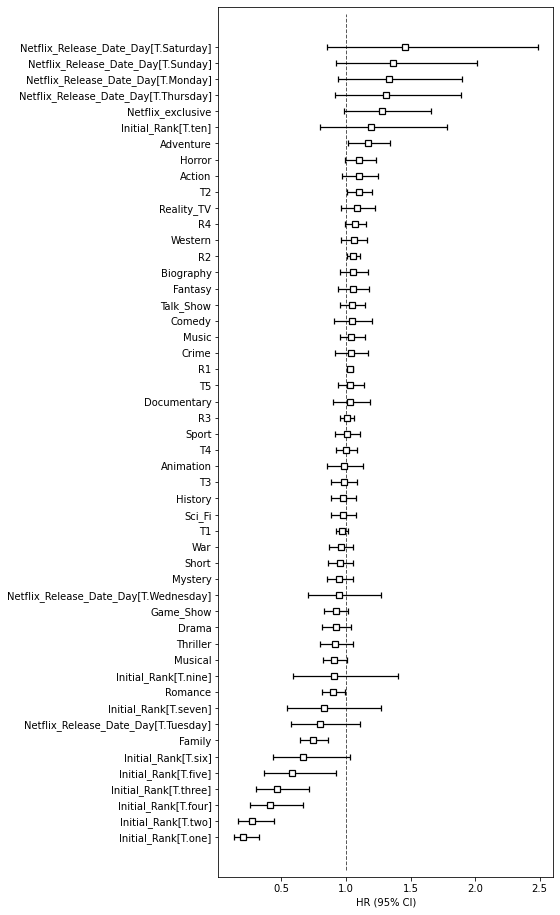

In [62]:
#Plot all hazard ratios within a 95% Confidence Interval

fig = plt.figure(figsize=(6,16))
ax = plt.subplot(111)
cph3.plot(ax=ax,hazard_ratios=True)

<AxesSubplot:>

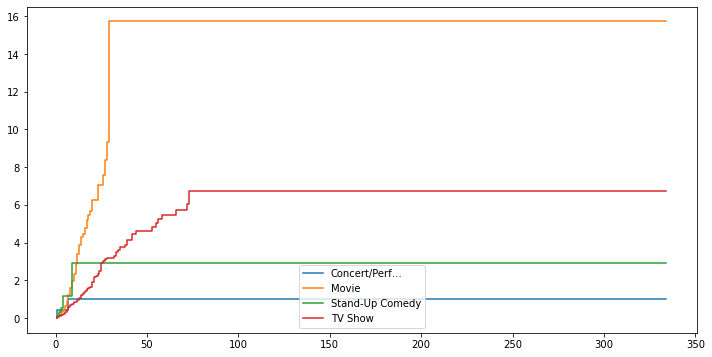

In [63]:
#Plot all cumulative hazards

cph3.baseline_cumulative_hazard_.plot(drawstyle="steps",figsize=(12,6))

## 13. Logrank Test on Video Type
<br>

[Back: Table of contents](#Table-of-contents)

In [64]:
#logrank_test
from lifelines.statistics import logrank_test #import package for LRT

lrt = pd.DataFrame(data=cph3.baseline_survival_) #create dataframe

#define columns
T1 = lrt['TV Show']
T2 = lrt['Movie']
T3 = lrt['Stand-Up Comedy']
T4 = lrt['Concert/Perf…']

#show results
results=logrank_test(T1,T2,T3,T4)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.81 <0.005      8.38

## 14. Cox PH Model 4
<font color='Red'>**This Cox PH Model includes all covariates, stratification on video type and ratings by consumer segment excluded**</font>
<br>

[Back: Table of contents](#Table-of-contents)

In [65]:
#Note1: If n_genres added, then Cox PH stops - Warning: High collinearity
#Note2: Although n_keywords makes e.g. T2 more significant, but this variable results into 0 Beta

cph4 = CoxPHFitter()
cph4.fit(df_final, duration_col='n_days_chart', show_progress=False, event_col='censored', strata='Type', formula = "Netflix_exclusive+Netflix_Release_Date_Day+Initial_Rank+T1+T2+T3+T4+T5+Drama+Comedy+Thriller+Action+Crime+Adventure+Family+Fantasy+Romance+Animation+Documentary+Mystery+Sci_Fi+Horror+Reality_TV+History+Biography+Sport+Musical+Music+Game_Show+War+Short+Western+Talk_Show")

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>

In [66]:
cph4.print_summary()

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>
             duration col = 'n_days_chart'
                event col = 'censored'
                   strata = Type
      baseline estimation = breslow
   number of observations = 527
number of events observed = 517
   partial log-likelihood = -2246.24
         time fit was run = 2022-01-03 18:31:28 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
Action                                  0.11       1.12       0.06            -0.01             0.23                 0.99                 1.26
Adventure                               0.13       1.13       0.07            -0.02             0.27                 0.98                 1.31
Animation                               0.00       1.00       0.07            -0.13             0.14                 0.87                 1.15
Biography                               0.04       1.04       0.05            -0.06             0.14                 0.94                 1.15
Comedy                                  0.00       1.00       0.07            -0.14             0.14                 0.87                 1.15
Crime                                   0.01       1.01       0.06            -0.11             0.12                 0.89                 1.13
Documentary                             0.04       1.04       0.07            -0.10             0.17                 0.91                 1.19
Drama                                  -0.11       0.89       0.06            -0.23             0.00                 0.79                 1.00
Family                                 -0.28       0.76       0.07            -0.42            -0.13                 0.66                 0.88
Fantasy                                 0.02       1.02       0.06            -0.09             0.14                 0.91                 1.15
Game_Show                              -0.09       0.91       0.05            -0.19             0.01                 0.83                 1.01
History                                -0.03       0.97       0.05            -0.13             0.07                 0.88                 1.08
Horror                                  0.09       1.10       0.06            -0.02             0.20                 0.98                 1.22
Initial_Rank[T.five]                   -0.58       0.56       0.24            -1.05            -0.11                 0.35                 0.89
Initial_Rank[T.four]                   -0.91       0.40       0.25            -1.39            -0.43                 0.25                 0.65
Initial_Rank[T.nine]                   -0.06       0.94       0.22            -0.49             0.36                 0.61                 1.44
Initial_Rank[T.one]                    -1.60       0.20       0.23            -2.05            -1.14                 0.13                 0.32
Initial_Rank[T.seven]                  -0.24       0.79       0.22            -0.66             0.18                 0.52                 1.20
Initial_Rank[T.six]                    -0.40       0.67       0.22            -0.83             0.03                 0.44                 1.03
Initial_Rank[T.ten]                     0.13       1.14       0.21            -0.27             0.54                 0.76                 1.71
Initial_Rank[T.three]                  -0.76       0.47       0.22            -1.19            -0.34                 0.30                 0.71
Initial_Rank[T.two]                    -1.30       0.27       0.25            -1.79            -0.81                 0.17                 0.44
Music                                   0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
Musical                 

In [67]:
cph4.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 46
        test_name = log-likelihood ratio test

---
 test_statistic      p  -log2(p)
         187.15 <0.005     60.49

## 15. Check Residuals on Model 3
<font color='Red'>**Schoenfeld, Martingale, Deviance Residuals**</font>
<br>

[Back: Table of contents](#Table-of-contents)

### Schoenfeld Residuals:

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



C:\ProgramData\Anaconda3\lib\site-packages\lifelines\fitters\mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic    p  -log2(p)
Action                                km              5.95 0.01      6.09
                                      rank            7.10 0.01      7.02
Adventure                             km              3.14 0.08      3.71
                                      rank            1.89 0.17      2.56
Animation                             km              3.99 0.05      4.45
                                      rank            3.54 0.06      4.06
Biography                             km              0.16 0.69      0.53
                                      rank            0.08 0.77      0.37
Comedy                                km              0.63 0.43      1.23
                                      rank            1.82 0.18      2.50
Crime                                 km              1.41 0.23      2.09
                                      rank            1.58 0.21      2.26
Documentary                           km              1.59 0.21      2.27
                                      rank            3.63 0.06      4.14
Drama                                 km              0.97 0.33      1.62
                                      rank            3.31 0.07      3.86
Family                                km              0.93 0.33      1.58
                                      rank            1.15 0.28      1.82
Fantasy                               km              0.00 0.95      0.07
                                      rank            3.13 0.08      3.70
Game_Show                             km              0.97 0.32      1.63
                                      rank            0.20 0.66      0.61
History                               km              2.76 0.10      3.38
                                      rank            1.44 0.23      2.11
Horror                                km              0.06 0.81      0.31
                                      rank            1.83 0.18      2.51
Initial_Rank[T.five]                  km              2.45 0.12      3.09
                                      rank            2.73 0.10      3.34
Initial_Rank[T.four]                  km              2.14 0.14      2.80
                                      rank            5.23 0.02      5.50
Initial_Rank[T.nine]                  km              6.76 0.01      6.74
                                      rank            0.04 0.85      0.24
Initial_Rank[T.one]                   km              4.52 0.03      4.90
                                      rank            2.55 0.11      3.18
Initial_Rank[T.seven]                 km              3.42 0.06      3.95
                                      rank            4.60 0.03      4.97
Initial_Rank[T.six]                   km              0.46 0.50      1.00
                                      rank            1.01 0.31      1.67
Initial_Rank[T.ten]                   km              3.45 0.06      3.99
                                      rank            1.34 0.25      2.01
Initial_Rank[T.three]                 km              3.14 0.08      3.71
                                      rank            2.12 0.15      2.78
Initial_Rank[T.two]                   km              4.93 0.03      5.24
                                      rank            2.27 0.13      2.92
Music                                 km              0.03 0.86      0.21
                                      rank            0.02 0.90      0.16
Musical                               km              0.76 0.38      1.39
                                      rank            0.51 0.47      1.07
Mystery                               km              0.09 0.77      0.39
                        



1. Variable 'Action' failed the non-proportional test: p-value is 0.0077.

   Advice: with so few unique values (only 2), you can include `strata=['Action', ...]` in the call
in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'Animation' failed the non-proportional test: p-value is 0.0458.

   Advice: with so few unique values (only 2), you can include `strata=['Animation', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'Initial_Rank[T.four]' failed the non-proportional test: p-value is 0.0221.

   Advice: with so few unique values (only 2), you can include `strata=['Initial_Rank[T.four]',
...]` in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'Initial_Rank[T.nine]' failed the non-proportional test: p-value is 0.0093.

   Advice: with so few unique values (onl

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0077)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0147)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0598)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0458)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0221)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.1435)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.8496)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0093)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.1102)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0336)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0319)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0645)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.1322)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0264)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0353)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0653)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p

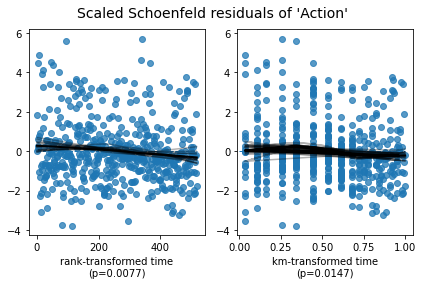

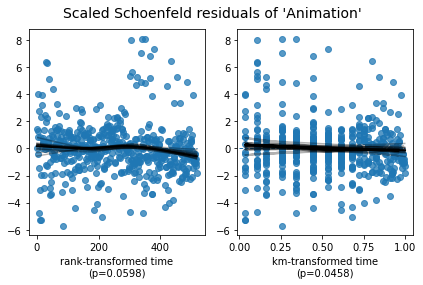

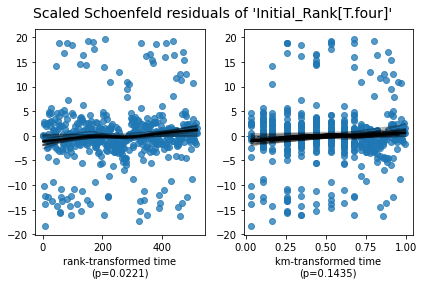

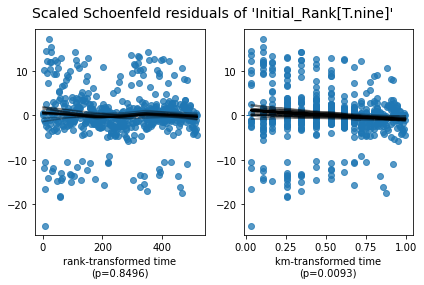

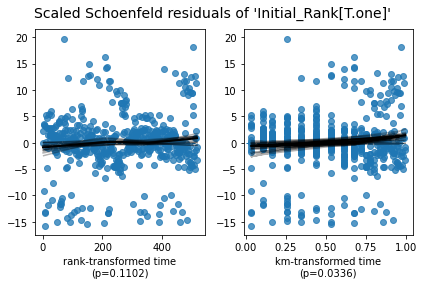

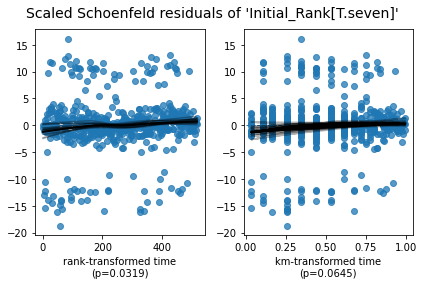

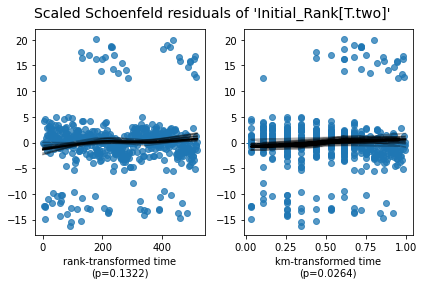

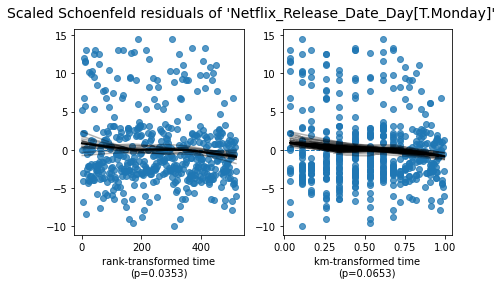

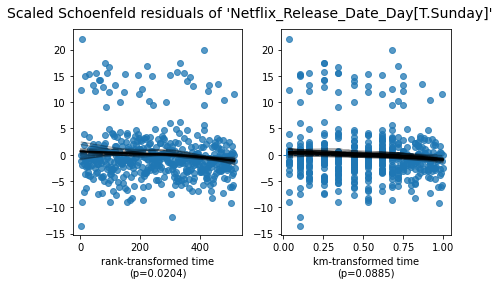

In [68]:
cph3.check_assumptions(df_final,p_value_threshold=0.05, show_plots=True)

**NOTE:** In order to run <font color='blue'> _compute_residuals_ </font>, one category should be excluded to avoid high collinearity 
* Debut Rank: 8
* Day: Friday

In [69]:
df

,Unnamed: 0,Title_URL,Title,Type,Netflix_exclusive,Netflix_Release_Date_Day,Initial_Rank,n_days_chart,n_genres,n_keywords,...,Music,Game_Show,War,Short,Western,Talk_Show,R1,R2,R3,R4
0,0,https://www.the-numbers.com/tv-show/Tiger-King...,"Tiger King: Murder, Mayhem …",TV Show,1,Friday,one,35,3,35,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,-5.474979,-0.528314,-0.013581,-0.097854
1,1,https://www.the-numbers.com/tv-show/All-Americ...,All American,TV Show,0,Thursday,two,66,2,14,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,-4.122706,1.061132,-0.758882,-0.197591
2,2,https://www.the-numbers.com/tv-show/Self-Made-...,Self Made: Inspired by the …,TV Show,1,Friday,three,7,3,2,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,-4.394604,-0.489461,0.728649,-0.362767
3,3,https://www.the-numbers.com/tv-show/Love-is-Bl...,Love is Blind,TV Show,1,Thursday,four,18,2,6,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,0.369288,-2.607386,0.536689,-0.464908
4,4,https://www.the-numbers.com/movie/Spenser-Conf...,Spenser Confidential,Movie,1,Friday,five,3,6,296,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,0.371312,-0.926887,0.110637,-0.148372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,522,https://www.the-numbers.com/movie/Grown-Ups#ta...,Grown Ups,Movie,0,Monday,four,4,1,153,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,0.944358,-2.290403,-1.052513,-0.391924
523,523,https://www.the-numbers.com/tv-show/Monsters-I...,Monsters Inside: The 24 Fac…,TV Show,1,Wednesday,five,4,2,1,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,5.479754,4.316539,-1.897408,-0.231610
524,524,https://www.the-numbers.com/movie/My-Little-Po...,My Little Pony: A New Gener…,Movie,1,Friday,five,3,6,45,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,-1.511181,-0.774584,0.218831,-0.309136
525,525,https://www.the-numbers.com/tv-show/Midnight-M...,Midnight Mass,TV Show,1,Friday,six,3,3,21,...,-0.152647,-0.124154,-0.124154,-0.107314,-0.075665,-0.061721,-5.944244,0.275433,0.709321,0.022189


In [70]:
#Create new dataframe for Martingale and Deviance Residuals

df2 = df.drop(df.iloc[:,:2],axis=1, inplace=False) #drop not needed columns
df2 = pd.get_dummies(df2, columns=['Netflix_Release_Date_Day','Initial_Rank']) #get dummy coding for categorical variables
df2.set_index('Title',inplace = True) #set index to Title
df2.head()

,Type,Netflix_exclusive,n_days_chart,n_genres,n_keywords,rating,censored,T1,T2,T3,...,Initial_Rank_eight,Initial_Rank_five,Initial_Rank_four,Initial_Rank_nine,Initial_Rank_one,Initial_Rank_seven,Initial_Rank_six,Initial_Rank_ten,Initial_Rank_three,Initial_Rank_two
Title,,,,,,,,,,,,,,,,,,,,,
"Tiger King: Murder, Mayhem …",TV Show,1,35,3,35,7.5,1,-1.012896,-0.363969,-0.049836,...,0,0,0,0,1,0,0,0,0,0
All American,TV Show,0,66,2,14,7.6,1,-0.916637,-0.024111,-0.085391,...,0,0,0,0,0,0,0,0,0,1
Self Made: Inspired by the …,TV Show,1,7,3,2,7.3,1,-1.098297,-0.387206,-0.074375,...,0,0,0,0,0,0,0,0,1,0
Love is Blind,TV Show,1,18,2,6,6.1,1,-1.112076,-0.301301,-0.053251,...,0,0,1,0,0,0,0,0,0,0
Spenser Confidential,Movie,1,3,6,296,6.2,1,7.597362,-0.250368,-2.279508,...,0,1,0,0,0,0,0,0,0,0


In [71]:
#Check columns

df2.columns

Index(['Type', 'Netflix_exclusive', 'n_days_chart', 'n_genres', 'n_keywords',
       'rating', 'censored', 'T1', 'T2', 'T3', 'T4', 'T5', 'Drama', 'Comedy',
       'Thriller', 'Action', 'Crime', 'Adventure', 'Family', 'Fantasy',
       'Romance', 'Animation', 'Documentary', 'Mystery', 'Sci_Fi', 'Horror',
       'Reality_TV', 'History', 'Biography', 'Sport', 'Musical', 'Music',
       'Game_Show', 'War', 'Short', 'Western', 'Talk_Show', 'R1', 'R2', 'R3',
       'R4', 'Netflix_Release_Date_Day_Friday',
       'Netflix_Release_Date_Day_Monday', 'Netflix_Release_Date_Day_Saturday',
       'Netflix_Release_Date_Day_Sunday', 'Netflix_Release_Date_Day_Thursday',
       'Netflix_Release_Date_Day_Tuesday',
       'Netflix_Release_Date_Day_Wednesday', 'Initial_Rank_eight',
       'Initial_Rank_five', 'Initial_Rank_four', 'Initial_Rank_nine',
       'Initial_Rank_one', 'Initial_Rank_seven', 'Initial_Rank_six',
       'Initial_Rank_ten', 'Initial_Rank_three', 'Initial_Rank_two'],
      dtype='objec

In [72]:
#Note1: If n_genres added, then Cox PH stops - Warning: High collinearity
#Note2: Although n_keywords makes e.g. T2 more significant, but this variable results into 0 Beta
#Note3: event_col = censored means 0 = right-censored otherwise 1
#Note4: Leave out base categories: Friday, Rank 8

cph5 = CoxPHFitter()
cph5.fit(df2, duration_col='n_days_chart', event_col='censored',show_progress=False, strata='Type', formula = "Netflix_exclusive+T1+T2+T3+T4+T5+Drama+Comedy+Thriller+Action+Crime+Adventure+Family+Fantasy+Romance+Animation+Documentary+Mystery+Sci_Fi+Horror+Reality_TV+History+Biography+Sport+Musical+Music+Game_Show+War+Short+Western+Talk_Show+R1+R2+R3+R4+Netflix_Release_Date_Day_Monday+Netflix_Release_Date_Day_Saturday+Netflix_Release_Date_Day_Sunday+Netflix_Release_Date_Day_Thursday+Netflix_Release_Date_Day_Tuesday+Netflix_Release_Date_Day_Wednesday+Initial_Rank_five+Initial_Rank_four+Initial_Rank_nine+Initial_Rank_one+Initial_Rank_seven+Initial_Rank_six+Initial_Rank_ten+Initial_Rank_three+Initial_Rank_two")

<lifelines.CoxPHFitter: fitted with 527 total observations, 10 right-censored observations>

### Martingale Residuals:

In [73]:
#swith column 'censored' so that right-censoring is correctly acknowledged

df2["censored"].replace({0: 1, 1: 0}, inplace=True) 
df2.head()

,Type,Netflix_exclusive,n_days_chart,n_genres,n_keywords,rating,censored,T1,T2,T3,...,Initial_Rank_eight,Initial_Rank_five,Initial_Rank_four,Initial_Rank_nine,Initial_Rank_one,Initial_Rank_seven,Initial_Rank_six,Initial_Rank_ten,Initial_Rank_three,Initial_Rank_two
Title,,,,,,,,,,,,,,,,,,,,,
"Tiger King: Murder, Mayhem …",TV Show,1,35,3,35,7.5,0,-1.012896,-0.363969,-0.049836,...,0,0,0,0,1,0,0,0,0,0
All American,TV Show,0,66,2,14,7.6,0,-0.916637,-0.024111,-0.085391,...,0,0,0,0,0,0,0,0,0,1
Self Made: Inspired by the …,TV Show,1,7,3,2,7.3,0,-1.098297,-0.387206,-0.074375,...,0,0,0,0,0,0,0,0,1,0
Love is Blind,TV Show,1,18,2,6,6.1,0,-1.112076,-0.301301,-0.053251,...,0,0,1,0,0,0,0,0,0,0
Spenser Confidential,Movie,1,3,6,296,6.2,0,7.597362,-0.250368,-2.279508,...,0,1,0,0,0,0,0,0,0,0


In [74]:
cph5.compute_residuals(df2, 'martingale')

C:\ProgramData\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:929: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


,n_days_chart,censored,martingale
Title,,,
"Ariana Grande: Excuse Me, I…",2.0,False,-0.309771
Death to 2020,8.0,False,-1.690229
The Occupant,1.0,False,-0.067580
Salt,1.0,False,-0.054963
House at the End of the Street,1.0,False,-0.068113
...,...,...,...
All American,66.0,False,-2.322068
Outer Banks,72.0,False,-4.845020
The Queen’s Gambit,73.0,False,-8.571605


C:\ProgramData\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:929: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


<AxesSubplot:xlabel='n_days_chart', ylabel='martingale'>

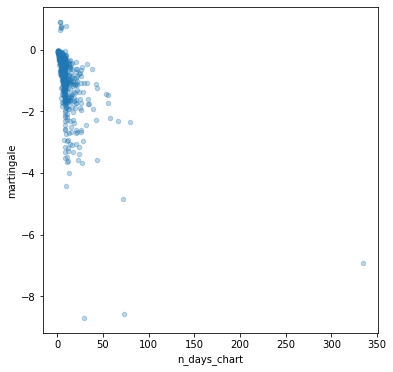

In [75]:
martingale = cph5.compute_residuals(df2, 'martingale')
martingale.plot.scatter(x='n_days_chart', y='martingale', alpha=0.3, figsize=(6,6))

### Deviance Residuals:

In [76]:
cph5.compute_residuals(df2, 'deviance')

C:\ProgramData\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:929: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


,n_days_chart,censored,deviance
Title,,,
"Ariana Grande: Excuse Me, I…",2.0,False,-0.787110
Death to 2020,8.0,False,-1.838602
The Occupant,1.0,False,-0.367640
Salt,1.0,False,-0.331549
House at the End of the Street,1.0,False,-0.369089
...,...,...,...
All American,66.0,False,-2.155026
Outer Banks,72.0,False,-3.112883
The Queen’s Gambit,73.0,False,-4.140436


C:\ProgramData\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:929: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


<AxesSubplot:xlabel='n_days_chart', ylabel='deviance'>

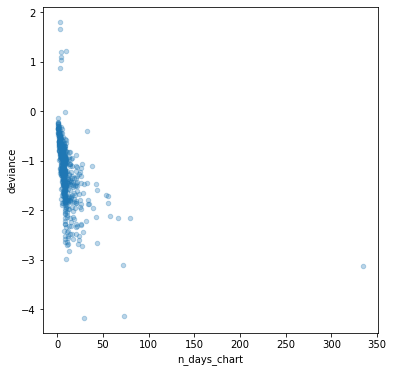

In [77]:
deviance = cph5.compute_residuals(df2, 'deviance')
deviance.plot.scatter(x='n_days_chart', y='deviance', alpha=0.3, figsize=(6,6))